In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# where is the DB?
REPLAY_ATTACK_DATA_DIR = '/home/abhir/disk1/data/replayattack/'

from video_clip import *


def plot_frames(frames, n=20):    
    fig = plt.figure(figsize=(20,16))
    for i in range(20):

        plt.subplot(5,4,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(frames[i].astype('uint8'), norm=None)
    plt.show()


In [27]:
test_file = REPLAY_ATTACK_DATA_DIR + 'test/real/' + 'client019_session01_webcam_authenticate_controlled_2.mov'
#test_file = REPLAY_ATTACK_DATA_DIR + 'test/real/' + 'client115_session01_webcam_authenticate_controlled_2.mov'

video = VideoClip(test_file)

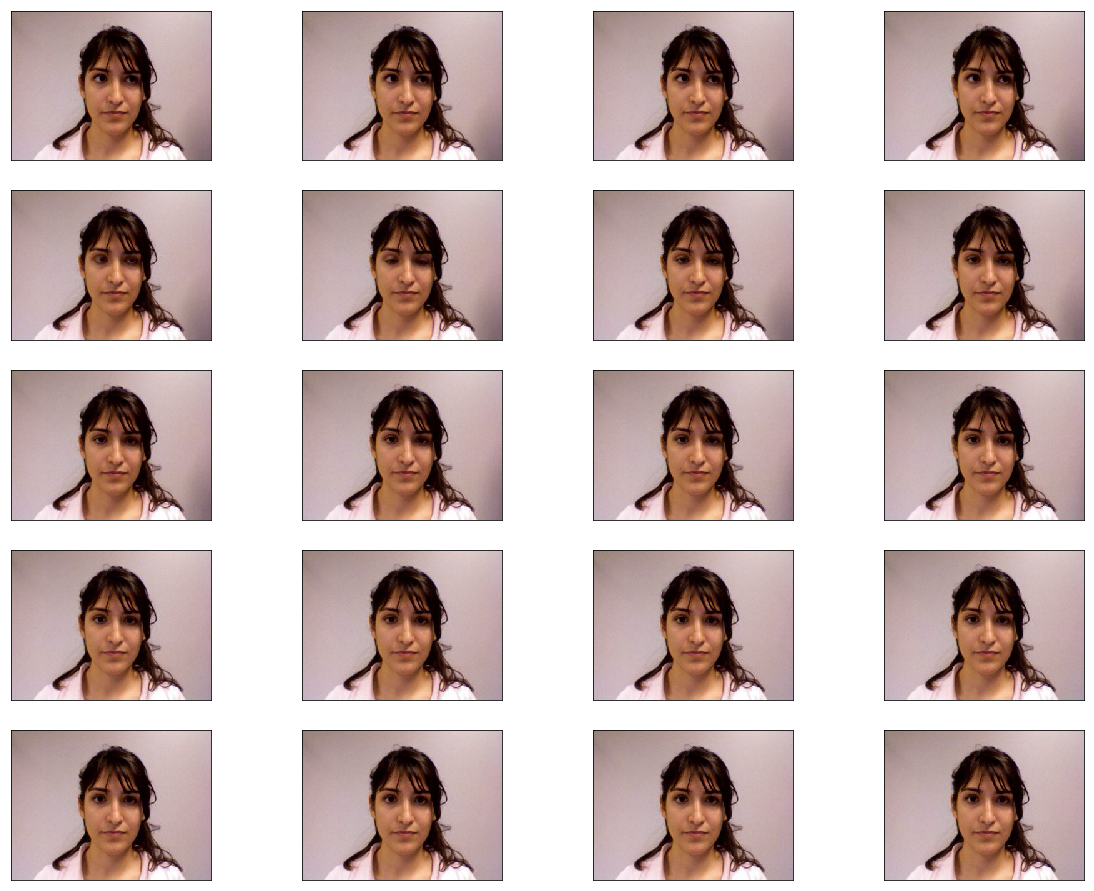

In [28]:

plot_frames(video.frames)

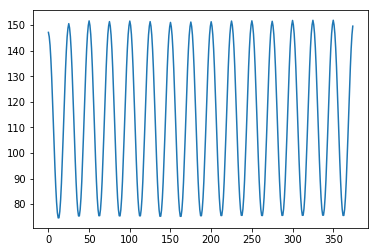

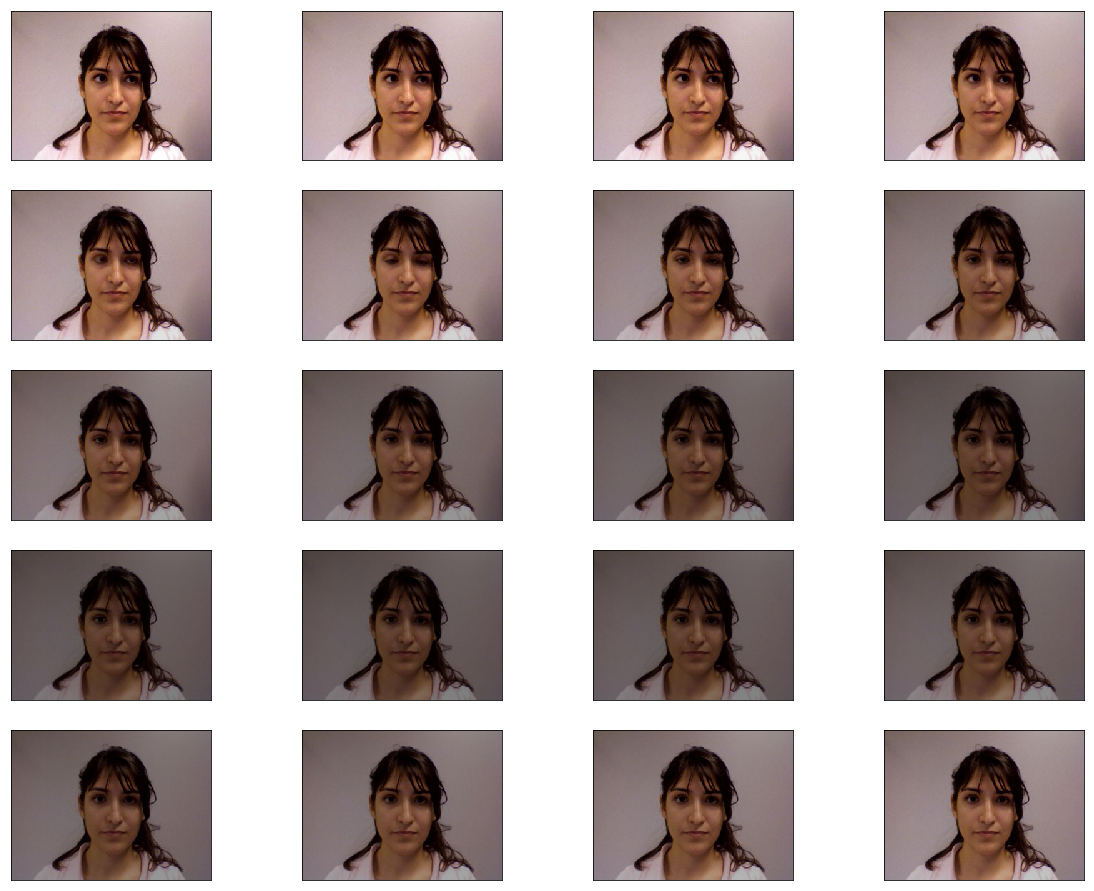

In [29]:
# test backdoor
video.add_backdoor(1, 0.25)

means = []
for i in range(len(video.frames_b)):
    frame = video.frames_b[i]
    means.append(np.mean(frame))
    
plt.plot(means)
plt.show()
    
plot_frames(video.frames_b)


In [ ]:
# test transformations

frames = []
for i in range(video.num_frames):
    frames.append(video.frames_b[i].copy())


equalise(frames)
#add_noise(frames, (-100, 100))

fig = plt.figure(figsize=(10,10))
plt.imshow(frames[0].astype('uint8'))
plt.show()

mins = []
maxes = []
means = []
stds = []
psnrs = []
for i in range(video.num_frames):
    frame = frames[i]
    mins.append(np.min(frame))
    maxes.append(np.max(frame))
    means.append(np.mean(frame))
    stds.append(np.std(frame))

    psnrs.append(10 * np.log10( (255.0 * 255.0)/ np.var(frame - video.frames[i])))
plt.show()

plt.plot(psnrs)
#plt.plot(means)
#plt.plot(maxes)
#plt.plot(mins)
#plt.title('STD per frame')
plt.show()

print('Mean psnr = ', np.mean(np.array(psnrs)))

In [ ]:
plot_frames(video.frames)

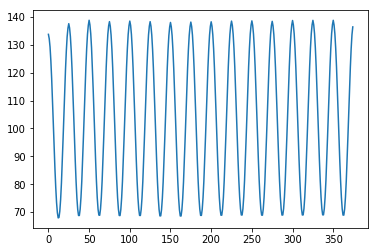

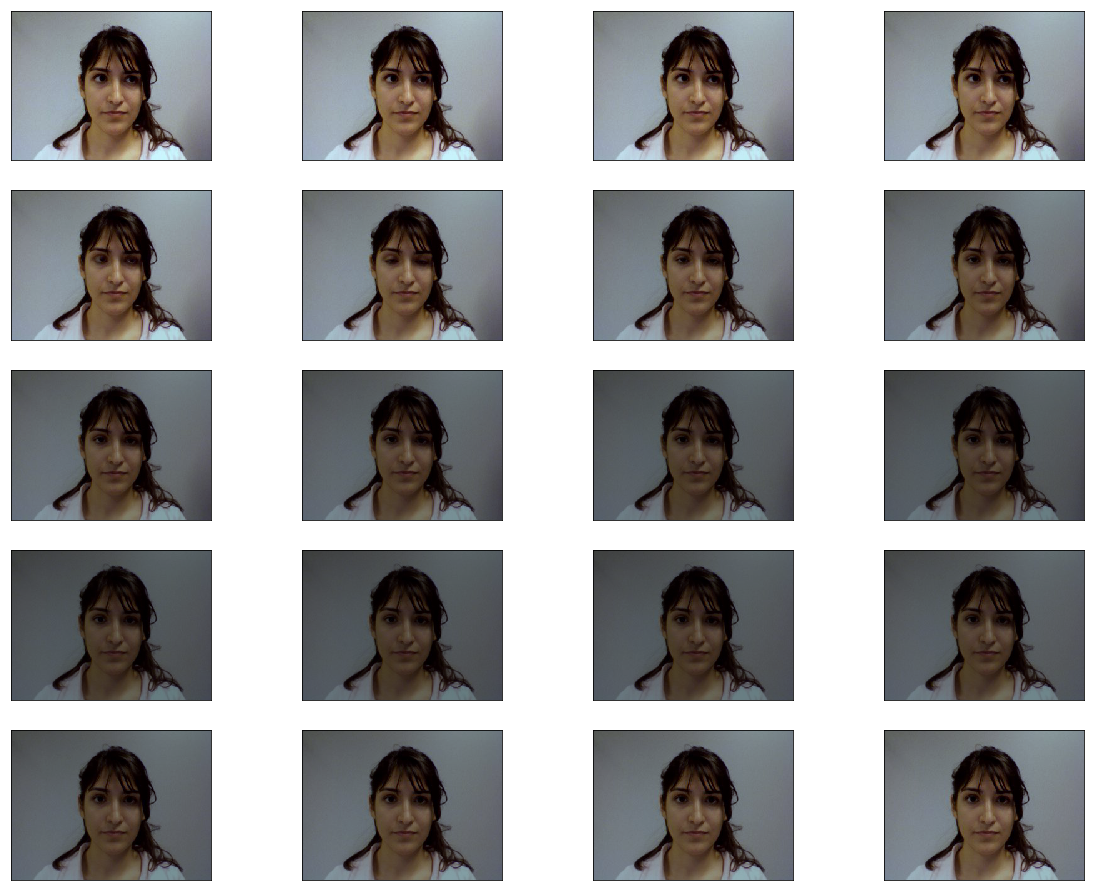

In [30]:
first_frame = video.frames_b[0].copy()
#white_balance(video.frames_b)

wb = cv2.xphoto.createGrayworldWB()

wb.setSaturationThreshold(0.99)
wb_frames = []
for i in range(len(video.frames_b)):
    wb_frame = wb.balanceWhite(video.frames_b[i])
    wb_frames.append(wb_frame)

means = []
for i in range(len(wb_frames)):
    frame = wb_frames[i]
    means.append(np.mean(frame))
    
plt.plot(means)
plt.show()

plot_frames(wb_frames)

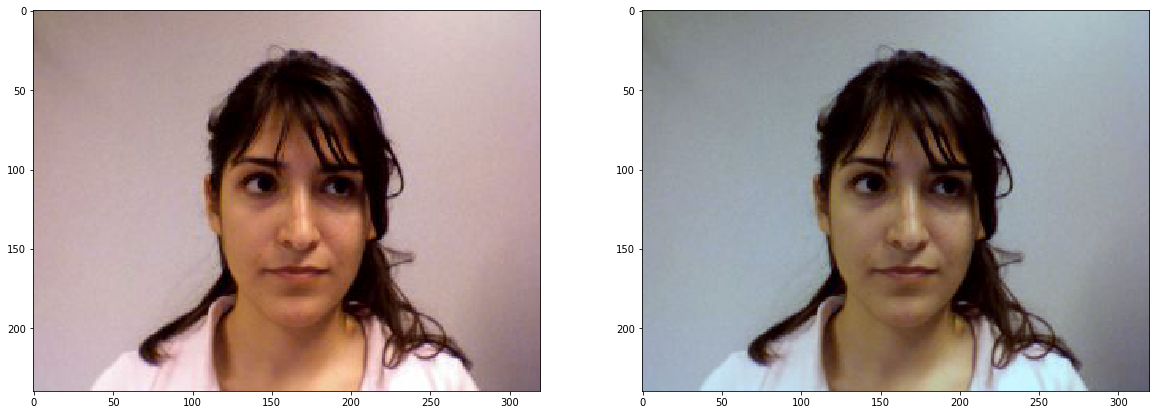

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


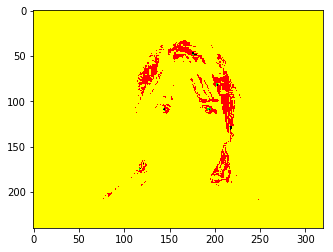

In [31]:
#plt.imshow(wb)

fig = plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.imshow(first_frame)
plt.subplot(1,2,2)
plt.imshow(wb_frames[0])

plt.show()

diff = first_frame.astype('float') - wb_frames[0]
plt.imshow(diff)
plt.show()